In [2]:
##loading module
import numpy as np
import pandas as pd
import cv2
from keras.models import load_model
import keras.backend as k1
from sklearn.model_selection import train_test_split
from skimage.io import imread,imshow
from skimage.transform import resize
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,MaxPooling2D,Dropout
from tensorflow.python.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from glob import glob
from tensorflow.python.keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

2022-10-10 14:10:18.834559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 14:10:19.574452: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-10 14:10:19.574519: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-10 14:10:19.703816: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already

In [5]:
'''
Extract features from images '''
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
extract=[]
name_items=[]
for i in l:
    name_items.append(i[16:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob("./"+path+j+"/*")
    for h in m:
        s=imread(h,as_gray=True)
        s=resize(s,(50,50))
        extract.append([np.array(s),j])
print(len(extract))
ex=extract        



['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']
1608


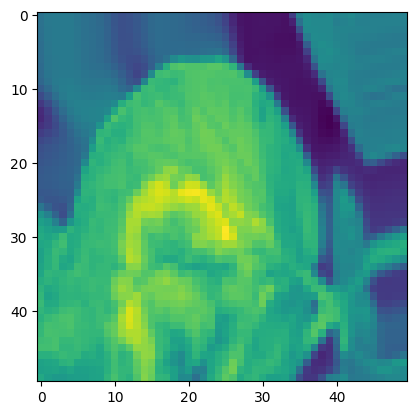

In [6]:
plt.imshow(extract[100][0])

In [13]:
x=[]
y=[]
for features,class_value in extract:
    x.append(features)
    y.append(class_value)
x=np.array(x)
y=np.array(y)
x=x.reshape(x.shape[0],50,50,1)
print(x.shape)

(1608, 50, 50, 1)


In [14]:
lb=LabelEncoder()
y=to_categorical(lb.fit_transform(y))
y


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [23]:
print(x.shape,y.shape)
k1.clear_session()

(1608, 50, 50, 1) (1608, 5)


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12345)

In [37]:
model=Sequential()
model.add(Conv2D(128,(3,3),padding="same",activation="relu",input_shape=(50,50,1)))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(4,4))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                

In [25]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=20,batch_size=128,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20
9/9 [==============================] - 8s 836ms/step - loss: 1.5244 - accuracy: 0.2942 - val_loss: 1.4442 - val_accuracy: 0.3168
Epoch 2/20
9/9 [==============================] - 8s 944ms/step - loss: 1.4528 - accuracy: 0.3467 - val_loss: 1.3942 - val_accuracy: 0.3789
Epoch 3/20
9/9 [==============================] - 8s 915ms/step - loss: 1.3544 - accuracy: 0.4311 - val_loss: 1.2427 - val_accuracy: 0.4658
Epoch 4/20
9/9 [==============================] - 9s 952ms/step - loss: 1.2093 - accuracy: 0.4871 - val_loss: 1.0896 - val_accuracy: 0.4928
Epoch 5/20
9/9 [==============================] - 6s 630ms/step - loss: 1.0650 - accuracy: 0.5191 - val_loss: 0.9956 - val_accuracy: 0.5652
Epoch 6/20
9/9 [==============================] - 6s 676ms/step - loss: 0.9721 - accuracy: 0.5493 - val_loss: 0.8847 - val_accuracy: 0.6273
Epoch 7/20
9/9 [==============================] - 6s 630ms/step - loss: 0.8786 - accuracy: 0.5884 - val_loss: 0.8948 - val_accuracy: 0.6501
Epoch 8/20
9/9 [====

In [29]:
s=["backleg","early-blight","late-blight","safe","septoria"]


TypeError: cannot pickle 'weakref.ReferenceType' object

In [27]:
p=imread("index.jpeg",as_gray=True)
p=resize(p,(50,50))
p=p.reshape(1,50,50,1)
p=model.predict(p)
print(s[np.argmax(p)])

backleg


In [52]:
k1.clear_session()
##dnn
dnn=Sequential()
dnn.add(Dense(100,activation="relu",input_shape=(50,50,1)))
dnn.add(Dropout(0.1))
dnn.add(Dense(100,activation="relu"))
dnn.add(Dropout(0.1))
dnn.add(Dense(100,activation="relu"))
dnn.add(Flatten())
dnn.add(Dense(5,activation="softmax"))
dnn.summary()
dnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50, 50, 100)       200       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 100)       0         
_________________________________________________________________
dense_1 (Dense)              (None, 50, 50, 100)       10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 100)       0         
_________________________________________________________________
dense_2 (Dense)              (None, 50, 50, 100)       10100     
_________________________________________________________________
flatten (Flatten)            (None, 250000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1

In [53]:
history1=dnn.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
9/9 [==============================] - 22s 2s/step - loss: 1.7019 - accuracy: 0.2027 - val_loss: 1.4730 - val_accuracy: 0.3602
Epoch 2/20
9/9 [==============================] - 23s 3s/step - loss: 1.3871 - accuracy: 0.4320 - val_loss: 1.2968 - val_accuracy: 0.5010
Epoch 3/20
9/9 [==============================] - 23s 3s/step - loss: 1.2260 - accuracy: 0.5333 - val_loss: 1.1075 - val_accuracy: 0.5342
Epoch 4/20
9/9 [==============================] - 20s 2s/step - loss: 1.0310 - accuracy: 0.5742 - val_loss: 1.1248 - val_accuracy: 0.5010
Epoch 5/20
9/9 [==============================] - 25s 3s/step - loss: 0.9697 - accuracy: 0.5973 - val_loss: 0.9558 - val_accuracy: 0.5901
Epoch 6/20
9/9 [==============================] - 20s 2s/step - loss: 0.8712 - accuracy: 0.6587 - val_loss: 0.9948 - val_accuracy: 0.5756
Epoch 7/20
9/9 [==============================] - 26s 3s/step - loss: 0.8209 - accuracy: 0.6711 - val_loss: 0.8944 - val_accuracy: 0.6273
Epoch 8/20
9/9 [==================

In [59]:
##svm using keras-cnn
k1.clear_session()
svm=Sequential()
svm.add(Conv2D(filters = 128, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(50,50,1)))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Flatten())
svm.add(Dense(128,activation="relu"))

#Output layer
svm.add(Dense(5,kernel_regularizer=l2(0.01),activation = "linear"))
svm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [60]:
svm.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
svm.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
9/9 [==============================] - 4s 337ms/step - loss: 0.8059 - accuracy: 0.2667 - val_loss: 0.7239 - val_accuracy: 0.3209
Epoch 2/20
9/9 [==============================] - 3s 305ms/step - loss: 0.7038 - accuracy: 0.3244 - val_loss: 0.6643 - val_accuracy: 0.3996
Epoch 3/20
9/9 [==============================] - 3s 305ms/step - loss: 0.6523 - accuracy: 0.3733 - val_loss: 0.6168 - val_accuracy: 0.4182
Epoch 4/20
9/9 [==============================] - 3s 305ms/step - loss: 0.6065 - accuracy: 0.4187 - val_loss: 0.5651 - val_accuracy: 0.5280
Epoch 5/20
9/9 [==============================] - 3s 304ms/step - loss: 0.5710 - accuracy: 0.4951 - val_loss: 0.5271 - val_accuracy: 0.5921
Epoch 6/20
9/9 [==============================] - 4s 513ms/step - loss: 0.5181 - accuracy: 0.5582 - val_loss: 0.4892 - val_accuracy: 0.5735
Epoch 7/20
9/9 [==============================] - 3s 304ms/step - loss: 0.4731 - accuracy: 0.5964 - val_loss: 0.4651 - val_accuracy: 0.6004
Epoch 8/20
9/9 [====

With 3channels

In [3]:
'''
3channels
Extract features from images '''
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
extract_color=[]
name_items=[]
for i in l:
    name_items.append(i[16:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob("./"+path+j+"/*")
    for h in m:
        #s=imread(h)
        #s=resize(s,(200,200))
        s = cv2.imread(h, cv2.IMREAD_COLOR)       
        s = cv2.resize(s, (100,100))
        s= cv2.cvtColor(s, cv2.COLOR_RGB2BGR)
        extract_color.append([np.array(s),j])
print(len(extract_color))
ex=extract_color        



['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']
1608


In [4]:
x1=[]
y1=[]
for features,class_value in extract_color:
    x1.append(features)
    y1.append(class_value)
x1=np.array(x1)
y1=np.array(y1)
#x=x.reshape(x.shape[0],50,50,1)
print(x1.shape)

(1608, 100, 100, 3)


In [5]:
x1=x1/255.0
x1

array([[[[0.63137255, 0.76470588, 0.29411765],
         [0.67058824, 0.78823529, 0.40784314],
         [0.74117647, 0.85098039, 0.50980392],
         ...,
         [0.39215686, 0.01960784, 0.00392157],
         [0.38823529, 0.01568627, 0.        ],
         [0.38823529, 0.01568627, 0.        ]],

        [[0.63529412, 0.76862745, 0.28627451],
         [0.6627451 , 0.78431373, 0.38039216],
         [0.72941176, 0.83921569, 0.49803922],
         ...,
         [0.40392157, 0.03137255, 0.01568627],
         [0.38823529, 0.01568627, 0.        ],
         [0.38039216, 0.00784314, 0.        ]],

        [[0.62352941, 0.75686275, 0.28627451],
         [0.65882353, 0.78431373, 0.36078431],
         [0.71372549, 0.82745098, 0.4745098 ],
         ...,
         [0.38431373, 0.01176471, 0.        ],
         [0.38823529, 0.01568627, 0.        ],
         [0.38823529, 0.01568627, 0.        ]],

        ...,

        [[0.41960784, 0.54901961, 0.38039216],
         [0.41960784, 0.54901961, 0.38039216]

In [6]:
lb=LabelEncoder()
y1=to_categorical(lb.fit_transform(y1))
y1


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [7]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3,random_state=12345)

In [12]:
k1.clear_session()

In [13]:
model_cnn=Sequential()
model_cnn.add(Conv2D(128,(3,3),padding="same",activation="relu",input_shape=(100,100,3)))
model_cnn.add(MaxPooling2D(4,4))
model_cnn.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model_cnn.add(MaxPooling2D(4,4))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation="relu"))
model_cnn.add(Dense(5,activation="softmax"))
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [14]:
model_cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

history=model_cnn.fit(x_train1,y_train1,epochs=20,batch_size=128,verbose=1,validation_data=(x_test1, y_test1))

Epoch 1/20


2022-10-10 14:16:29.586725: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2022-10-10 14:16:30.871883: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.


1/9 [==>...........................] - ETA: 27s - loss: 1.6704 - accuracy: 0.0312

2022-10-10 14:16:32.264962: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2022-10-10 14:16:33.455187: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.


2/9 [=====>........................] - ETA: 18s - loss: 1.5663 - accuracy: 0.1445

2022-10-10 14:16:34.847104: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.


9/9 [==============================] - 27s 3s/step - loss: 1.3714 - accuracy: 0.3218 - val_loss: 1.1668 - val_accuracy: 0.4037
Epoch 2/20
9/9 [==============================] - 27s 3s/step - loss: 0.9223 - accuracy: 0.6231 - val_loss: 0.6813 - val_accuracy: 0.7474
Epoch 3/20
9/9 [==============================] - 26s 3s/step - loss: 0.5517 - accuracy: 0.7662 - val_loss: 0.4505 - val_accuracy: 0.8095
Epoch 4/20
9/9 [==============================] - 27s 3s/step - loss: 0.3302 - accuracy: 0.8916 - val_loss: 0.2400 - val_accuracy: 0.9524
Epoch 5/20
9/9 [==============================] - 26s 3s/step - loss: 0.2006 - accuracy: 0.9369 - val_loss: 0.1518 - val_accuracy: 0.9648
Epoch 6/20
9/9 [==============================] - 27s 3s/step - loss: 0.1514 - accuracy: 0.9467 - val_loss: 0.1533 - val_accuracy: 0.9503
Epoch 7/20
9/9 [==============================] - 26s 3s/step - loss: 0.0907 - accuracy: 0.9822 - val_loss: 0.0677 - val_accuracy: 0.9917
Epoch 8/20
9/9 [=============================

SVM-CNN

In [24]:
##svm using keras-cnn
k1.clear_session()
svm=Sequential()
svm.add(Conv2D(filters = 128, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(100,100,3)))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Flatten())
svm.add(Dense(128,activation="relu"))

#Output layer
svm.add(Dense(5,kernel_regularizer=l2(0.01),activation = "linear"))
svm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               991360    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [26]:
svm.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
svm.fit(x_train1,y_train1,batch_size=128,epochs=20,verbose=1,validation_data=(x_test1,y_test1))

Epoch 1/20
9/9 [==============================] - 17s 2s/step - loss: 0.8241 - accuracy: 0.3218 - val_loss: 0.6307 - val_accuracy: 0.5217
Epoch 2/20
9/9 [==============================] - 16s 2s/step - loss: 0.5823 - accuracy: 0.5422 - val_loss: 0.4964 - val_accuracy: 0.7371
Epoch 3/20
9/9 [==============================] - 16s 2s/step - loss: 0.4195 - accuracy: 0.7511 - val_loss: 0.3502 - val_accuracy: 0.8406
Epoch 4/20
9/9 [==============================] - 16s 2s/step - loss: 0.2798 - accuracy: 0.8809 - val_loss: 0.2320 - val_accuracy: 0.8344
Epoch 5/20
9/9 [==============================] - 16s 2s/step - loss: 0.1891 - accuracy: 0.9458 - val_loss: 0.1604 - val_accuracy: 0.9855
Epoch 6/20
9/9 [==============================] - 17s 2s/step - loss: 0.1326 - accuracy: 0.9751 - val_loss: 0.1119 - val_accuracy: 0.9979
Epoch 7/20
9/9 [==============================] - 17s 2s/step - loss: 0.1035 - accuracy: 0.9867 - val_loss: 0.0936 - val_accuracy: 0.9855
Epoch 8/20
9/9 [==================

DNN

In [30]:
k1.clear_session()
##dnn
dnn=Sequential()
dnn.add(Dense(64,activation="relu",input_shape=(100,100,3)))
dnn.add(Dropout(0.1))
dnn.add(Dense(32,activation="relu"))

dnn.add(Flatten())
dnn.add(Dense(5,activation="softmax"))
dnn.summary()
dnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100, 100, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 64)      0         
_________________________________________________________________
dense_1 (Dense)              (None, 100, 100, 32)      2080      
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1600005   
Total params: 1,602,341
Trainable params: 1,602,341
Non-trainable params: 0
_________________________________________________________________


In [31]:
history1=dnn.fit(x_train1,y_train1,batch_size=128,epochs=10,verbose=1,validation_data=(x_test1,y_test1))

Epoch 1/10
9/9 [==============================] - 23s 3s/step - loss: 7.8325 - accuracy: 0.2676 - val_loss: 3.0827 - val_accuracy: 0.3665
Epoch 2/10
9/9 [==============================] - 22s 2s/step - loss: 2.2408 - accuracy: 0.4258 - val_loss: 1.3475 - val_accuracy: 0.3416
Epoch 3/10
9/9 [==============================] - 23s 3s/step - loss: 0.9606 - accuracy: 0.6160 - val_loss: 1.0848 - val_accuracy: 0.5631
Epoch 4/10
9/9 [==============================] - 22s 2s/step - loss: 0.5744 - accuracy: 0.7467 - val_loss: 0.7314 - val_accuracy: 0.6190
Epoch 5/10
9/9 [==============================] - 22s 2s/step - loss: 0.3349 - accuracy: 0.8498 - val_loss: 0.3788 - val_accuracy: 0.8282
Epoch 6/10
9/9 [==============================] - 23s 3s/step - loss: 0.2182 - accuracy: 0.9289 - val_loss: 0.4196 - val_accuracy: 0.7805
Epoch 7/10
9/9 [==============================] - 22s 2s/step - loss: 0.1540 - accuracy: 0.9636 - val_loss: 0.4266 - val_accuracy: 0.7619
Epoch 8/10
9/9 [==================

In [15]:
##vgg16 and xgboost
from keras.applications.vgg16 import VGG16
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))

58889256/58889256 [==============================] - 6s 0us/step
